In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('glassdoor_jobs_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,pytorch_yn,algo_yn,stats_yn,tableau_yn,job_type,job_type_num,seniority,seniority_num,len_desc,num_comp
0,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,1,1,0,data scientist,3,na,2,3994,0
1,Associate Business Intelligence Data Scientist,$64K-$106K (Glassdoor est.),"Blending customer advisory, customer support, ...",3.2,Carousel Industries,"Exeter, RI","Exeter, RI",1001 to 5000 employees,1992,Company - Private,...,0,0,1,1,data scientist,3,na,2,5396,0
2,"Scientist, Population Genomics",$64K-$106K (Glassdoor est.),WuXi NextCODE is seeking a motivated Scientist...,2.9,Carousel Industries,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2015,Company - Private,...,0,0,1,0,na,7,na,2,3203,0
3,Data Analyst II,$64K-$106K (Glassdoor est.),The Data Analyst II is responsible for data en...,4.2,"Insight Enterprises, Inc.","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,Company - Public,...,0,0,0,0,analyst,1,na,2,4282,3
4,Sensory Scientist,$64K-$106K (Glassdoor est.),A leading food production company in St. Louis...,3.8,NIC Infotek,"Saint Louis, MO","Tampa, FL",51 to 200 employees,2004,Company - Public,...,0,0,1,0,na,7,na,2,1852,0


In [4]:
df.shape

(940, 42)

In [5]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'State', 'jobhq', 'age',
       'python_yn', 'r_yn', 'aws_yn', 'spark_yn', 'hadoop_yn', 'docker_yn',
       'sql_yn', 'linux_yn', 'flask_yn', 'django_yn', 'tensorflow_yn',
       'keras_yn', 'pytorch_yn', 'algo_yn', 'stats_yn', 'tableau_yn',
       'job_type', 'job_type_num', 'seniority', 'seniority_num', 'len_desc',
       'num_comp'],
      dtype='object')

For model building only numerical values are needed,It is possible to use one-hot encoding and passing on 
those encodings to the final application program to use categorical 
variables as well, but for now, the simplified model should suffice.

In [6]:
# declaring a model varibale 
df_model=df[['avg_salary','Rating','jobhq','age','num_comp',
             'python_yn', 'r_yn', 'aws_yn', 'spark_yn', 'hadoop_yn', 'docker_yn','sql_yn', 'linux_yn',
             'flask_yn', 'django_yn', 'tensorflow_yn','keras_yn', 'pytorch_yn', 'tableau_yn',
             'algo_yn', 'stats_yn','len_desc','job_type_num','seniority_num']]

In [7]:
df_model.head()

,avg_salary,Rating,jobhq,age,num_comp,python_yn,r_yn,aws_yn,spark_yn,hadoop_yn,...,django_yn,tensorflow_yn,keras_yn,pytorch_yn,tableau_yn,algo_yn,stats_yn,len_desc,job_type_num,seniority_num
0,85.0,4.2,0,53,0,0,1,0,0,1,...,0,0,0,0,0,1,1,3994,3,2
1,85.0,3.2,1,29,0,1,1,0,0,0,...,0,0,0,0,1,0,1,5396,3,2
2,85.0,2.9,1,6,0,1,1,0,0,0,...,0,0,0,0,0,0,1,3203,7,2
3,85.0,4.2,0,33,3,0,1,0,0,0,...,0,0,0,0,0,0,0,4282,1,2
4,85.0,3.8,0,17,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1852,7,2


In [8]:
#Getiing out the dummies

In [9]:
df_dum=pd.get_dummies(df_model)
df_dum

,avg_salary,Rating,jobhq,age,num_comp,python_yn,r_yn,aws_yn,spark_yn,hadoop_yn,...,django_yn,tensorflow_yn,keras_yn,pytorch_yn,tableau_yn,algo_yn,stats_yn,len_desc,job_type_num,seniority_num
0,85.0,4.2,0,53,0,0,1,0,0,1,...,0,0,0,0,0,1,1,3994,3,2
1,85.0,3.2,1,29,0,1,1,0,0,0,...,0,0,0,0,1,0,1,5396,3,2
2,85.0,2.9,1,6,0,1,1,0,0,0,...,0,0,0,0,0,0,1,3203,7,2
3,85.0,4.2,0,33,3,0,1,0,0,0,...,0,0,0,0,0,0,0,4282,1,2
4,85.0,3.8,0,17,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1852,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,126.0,3.6,1,7,3,1,1,0,0,0,...,0,0,0,0,0,0,0,2126,3,2
936,126.0,2.9,0,7,0,1,1,0,0,0,...,0,1,0,0,0,0,1,2926,3,2
937,126.0,3.1,0,180,2,1,1,0,0,0,...,0,0,0,0,0,0,1,3556,3,2
938,126.0,4.9,1,5,0,1,1,0,1,1,...,0,0,0,0,0,1,1,3709,3,2


In [10]:
# Splitting the datasets 

from sklearn.model_selection import train_test_split
X=df_dum.drop('avg_salary',axis=1)
y=df_dum.avg_salary.values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [12]:
X_test.head()

,Rating,jobhq,age,num_comp,python_yn,r_yn,aws_yn,spark_yn,hadoop_yn,docker_yn,...,django_yn,tensorflow_yn,keras_yn,pytorch_yn,tableau_yn,algo_yn,stats_yn,len_desc,job_type_num,seniority_num
644,4.9,0,-1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,5067,3,2
737,4.2,0,18,0,1,1,0,1,1,0,...,0,0,0,0,0,1,1,1462,3,2
3,4.2,0,33,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,4282,1,2
905,3.6,0,133,0,1,1,0,1,1,0,...,0,0,0,0,0,1,1,3633,3,2
104,4.0,1,61,3,1,1,1,0,0,1,...,0,0,0,0,0,1,1,5304,2,2


In [13]:
X_test.columns

Index(['Rating', 'jobhq', 'age', 'num_comp', 'python_yn', 'r_yn', 'aws_yn',
       'spark_yn', 'hadoop_yn', 'docker_yn', 'sql_yn', 'linux_yn', 'flask_yn',
       'django_yn', 'tensorflow_yn', 'keras_yn', 'pytorch_yn', 'tableau_yn',
       'algo_yn', 'stats_yn', 'len_desc', 'job_type_num', 'seniority_num'],
      dtype='object')

Multiple-Linear Regression

In [14]:
import statsmodels.api as sm
X_sm=x=sm.add_constant(X)
model=sm.OLS(y,X_sm)

In [15]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.536
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           9.62e-05
Time:                        13:35:17   Log-Likelihood:                -4433.8
No. Observations:                 940   AIC:                             8916.
Df Residuals:                     916   BIC:                             9032.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            93.2881      9.335      9.993      0.000      74.968     111.609
Rating            2.4797      1.504      1.649      0.099      -0.471       5.431
jobhq             0.5734      1.896      0.302      0.762      -3.148       4.295
age               0.0313      0.022      1.429      0.153      -0.012       0.074
num_comp          0.0309      0.732      0.042      0.966      -1.406       1.468
python_yn         3.6933      2.440      1.514      0.130      -1.095       8.481
r_yn              2.4827      4.584      0.542      0.588      -6.514      11.479
aws_yn           -3.5031      2.292     -1.529      0.127      -8.001       0.994
spark_yn          0.0588      2.801      0.021      0.983      -5.438       5.556
hadoop_yn        -1.6499      2.769     -0.596      0.551      -7.084       3.784
docker_yn         1.2405      5.569      0.223      0.824      -9.689      12.170
sql_yn            2.0584      2.107      0.977      0.329      -2.076       6.193
linux_yn          5.0136      3.259      1.538      0.124      -1.383      11.410
flask_yn          8.8876      9.252      0.961      0.337      -9.269      27.045
django_yn         5.7919     10.310      0.562      0.574     -14.443      26.026
tensorflow_yn    -5.0005      3.692     -1.354      0.176     -12.246       2.245
keras_yn          1.5396      4.512      0.341      0.733      -7.315      10.394
pytorch_yn        6.1676      4.196      1.470      0.142      -2.068      14.403
tableau_yn       -2.8877      2.465     -1.172      0.242      -7.725       1.949
algo_yn           2.2018      2.055      1.072      0.284      -1.831       6.234
stats_yn          8.0053      2.250      3.558      0.000       3.590      12.421
len_desc         -0.0016      0.001     -2.596      0.010      -0.003      -0.000
job_type_num     -0.8374      0.646     -1.296      0.195      -2.106       0.431
seniority_num     2.3810      2.507      0.950      0.343      -2.540       7.302
==============================================================================
Omnibus:                       20.641   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.555
Skew:                           0.242   Prob(JB):                     0.000254
Kurtosis:                       2.566   Cond. No.                     5.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [17]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-24.098688570177497

Lasso Regresssion

In [19]:
lm_l=Lasso(alpha=.19)

In [20]:
lm_l.fit(X_train,y_train)

Lasso(alpha=0.19)

In [21]:
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-23.999539551294202

In [22]:
alpha=[]
error=[]

In [23]:
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error', cv=3)))

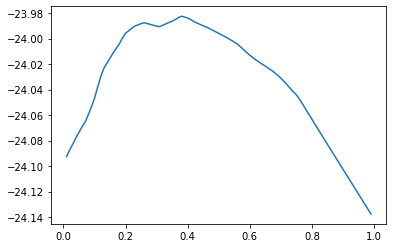

In [24]:
plt.plot(alpha,error)

In [25]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
37,0.38,-23.982505


Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf1=rf.fit(X_train,y_train)
np.mean(cross_val_score(rf1,X_train,y_train,scoring='neg_mean_absolute_error', cv=3))

-23.01661827413932

Tune Models GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
X_train=preprocessing.scale(X_train)

In [28]:
parameters={'n_estimators':range(10,200,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [29]:
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3,n_jobs=-1)


In [30]:
gs.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 200, 10)},
             scoring='neg_mean_absolute_error')

In [31]:
gs.best_score_

-22.41405940049326

In [32]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=70)

Test Ensemble

In [33]:
tpred_lm=lm.predict(X_test)

In [34]:
tpred_lml=lm_l.predict(X_test)

In [35]:
tpred_rfgs=gs.best_estimator_.predict(X_test)

In [36]:
tpred_rf=rf1.predict(X_test)

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)


23.256526646677482

In [38]:
mean_absolute_error(y_test,tpred_lml)

23.577245581885734

In [39]:
mean_absolute_error(y_test,tpred_rfgs)

24.209669452887535

The Random Forest model seems to have the least error, so that's the model that will be chosen.

Pickling (but using JobLib instead of Pickle)

In [51]:
import joblib


In [53]:
joblib.dump(rf1,'md.pkl')

['md.pkl']

In [54]:
md=joblib.load('md.pkl')

In [57]:
md.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

107.79979166666666